<ipython-input-6-abfc80e64bb9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overs', y='RunsScored', data=runs_per_over, palette='Blues')


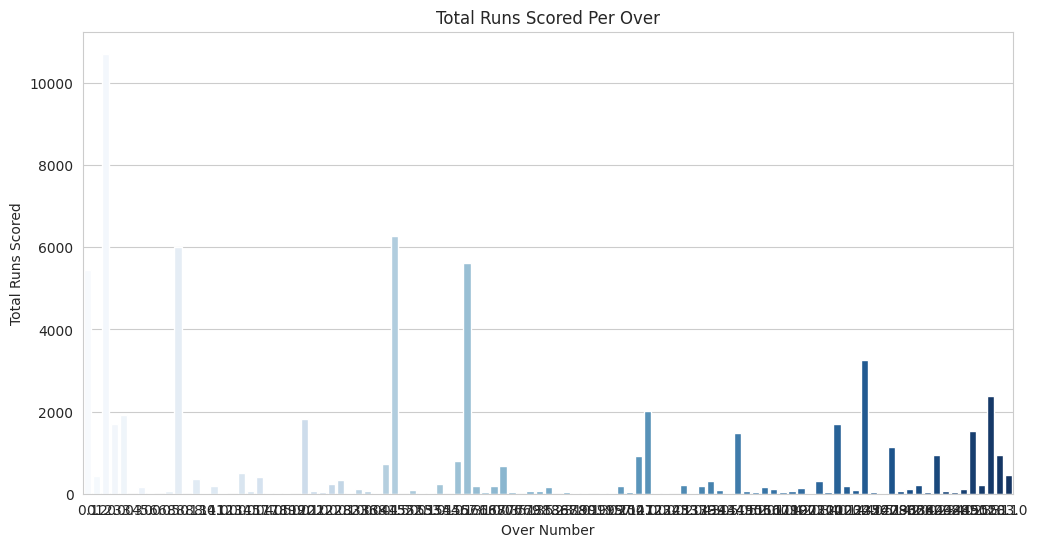

<ipython-input-6-abfc80e64bb9>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type', data=ipl_df, palette='coolwarm', order=ipl_df['Type'].value_counts().index)


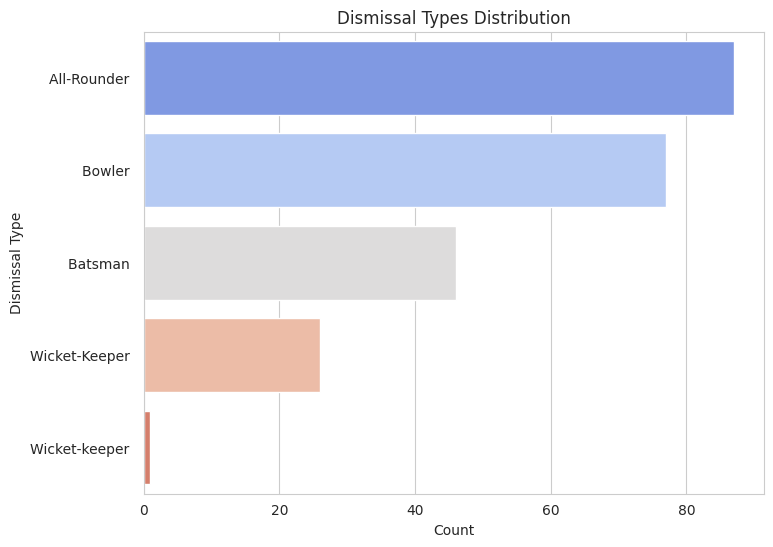

<ipython-input-6-abfc80e64bb9>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RunsConceded', y='Team', data=extra_runs, palette='Set1')


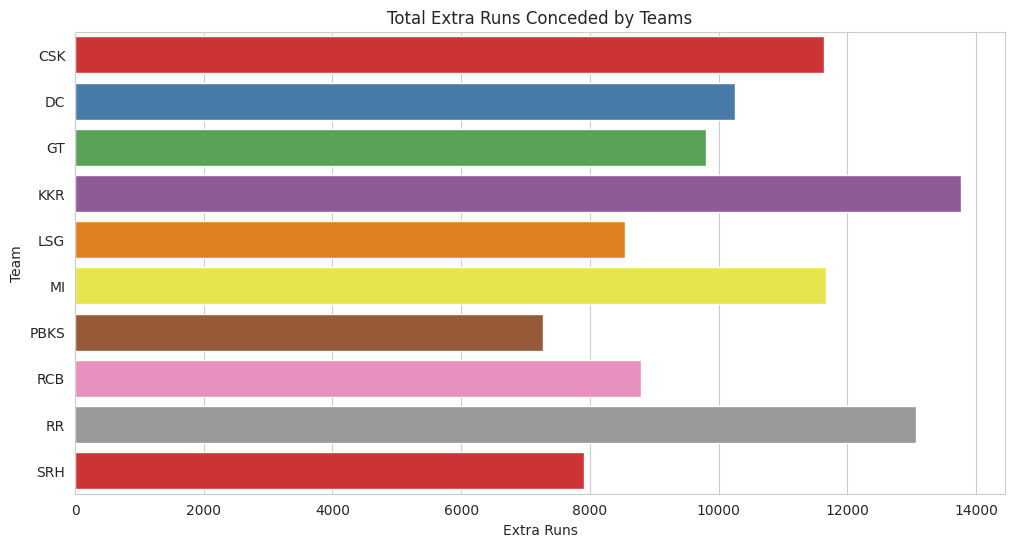

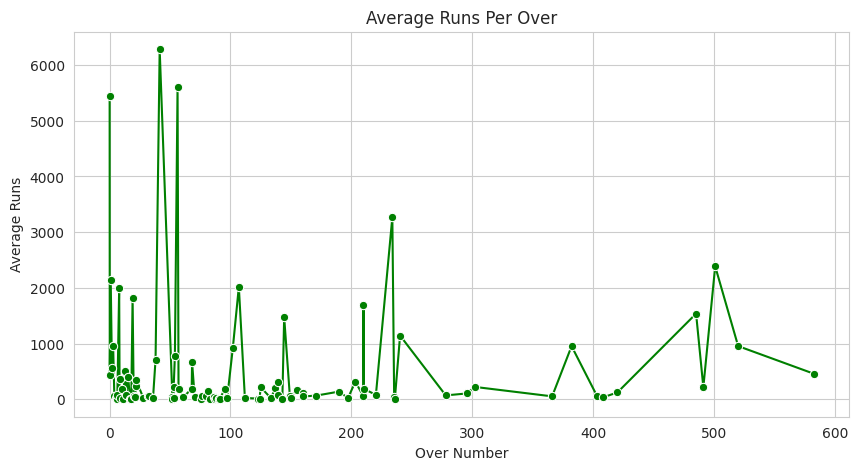

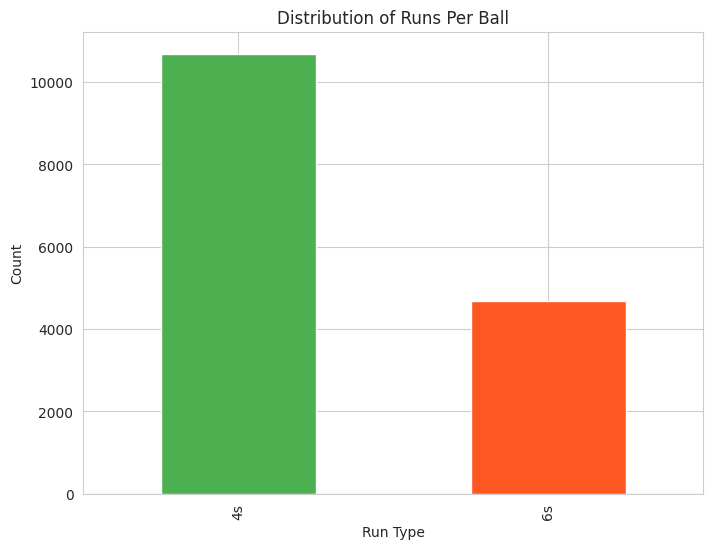

<ipython-input-6-abfc80e64bb9>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BattingS/R', y='Name', data=top_strike_rate, palette='magma')


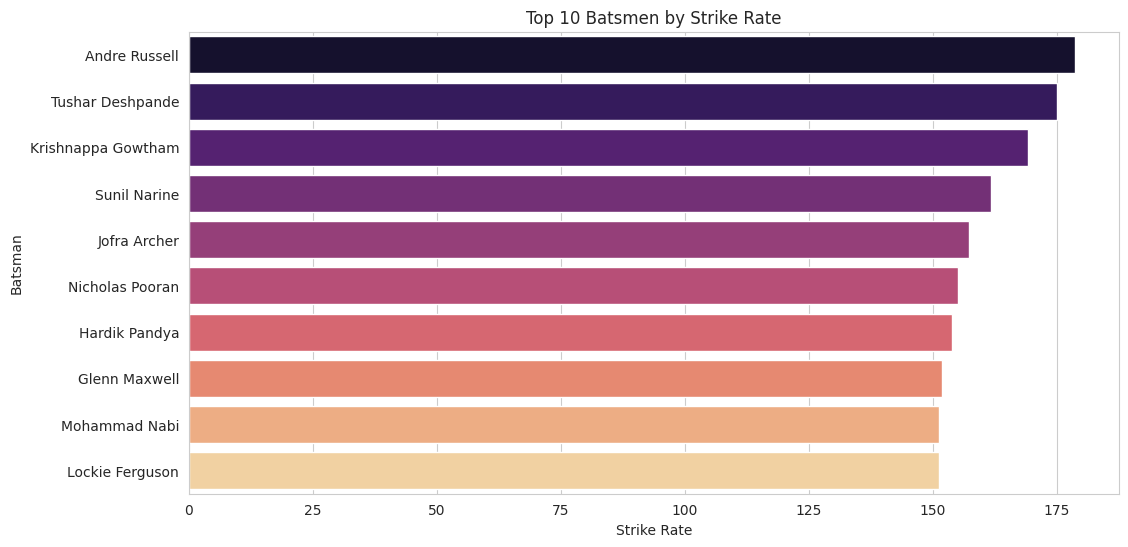

<ipython-input-6-abfc80e64bb9>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='6s', y='Name', data=top_six_hitters, palette='viridis')


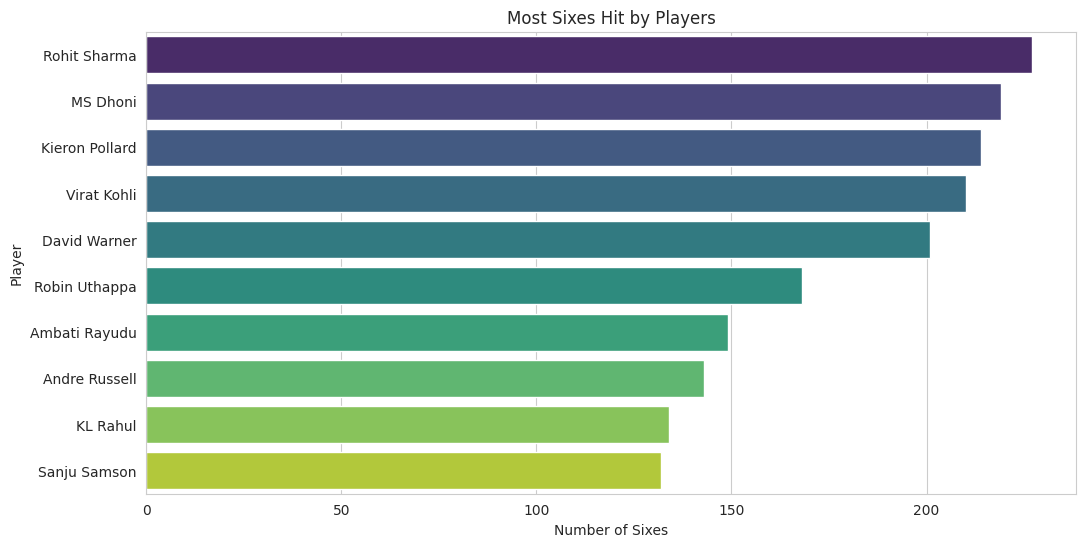

<ipython-input-6-abfc80e64bb9>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DotBallPct', y='Name', data=top_dot_bowlers, palette='rocket')


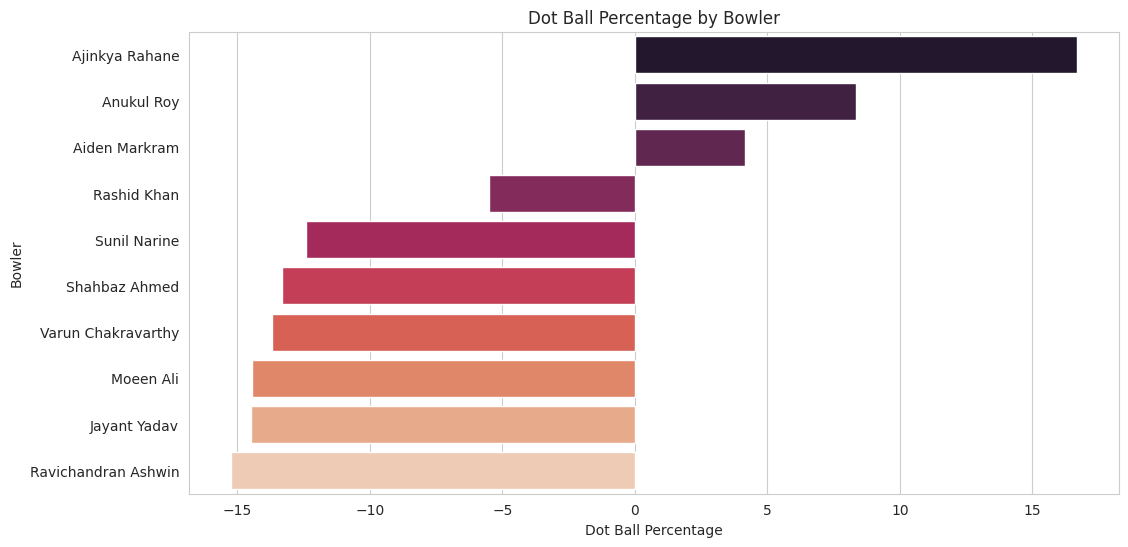

<ipython-input-6-abfc80e64bb9>:93: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BoundariesConceded', y='Name', data=top_boundary_conceders, palette='cubehelix')


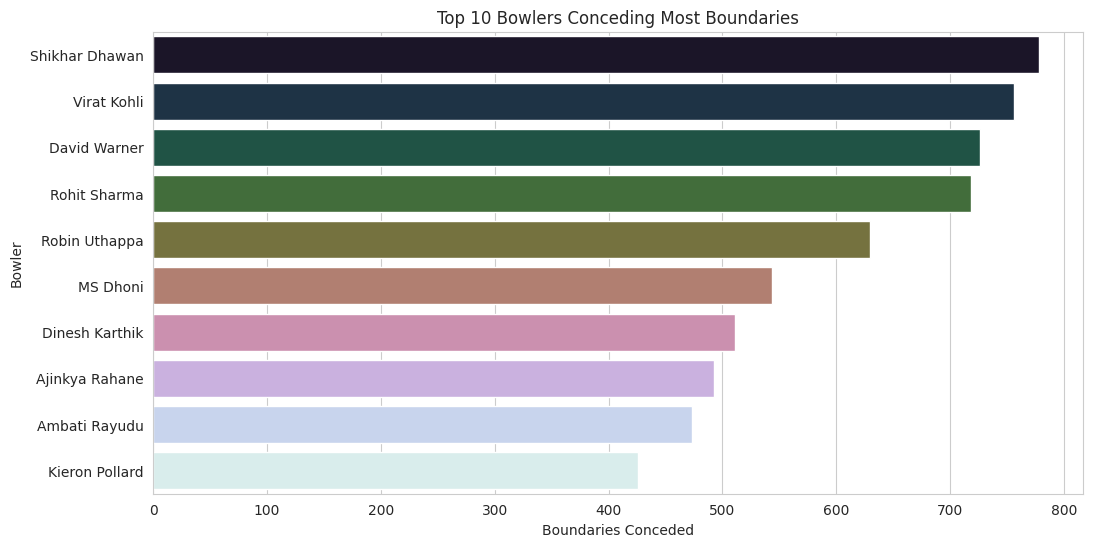

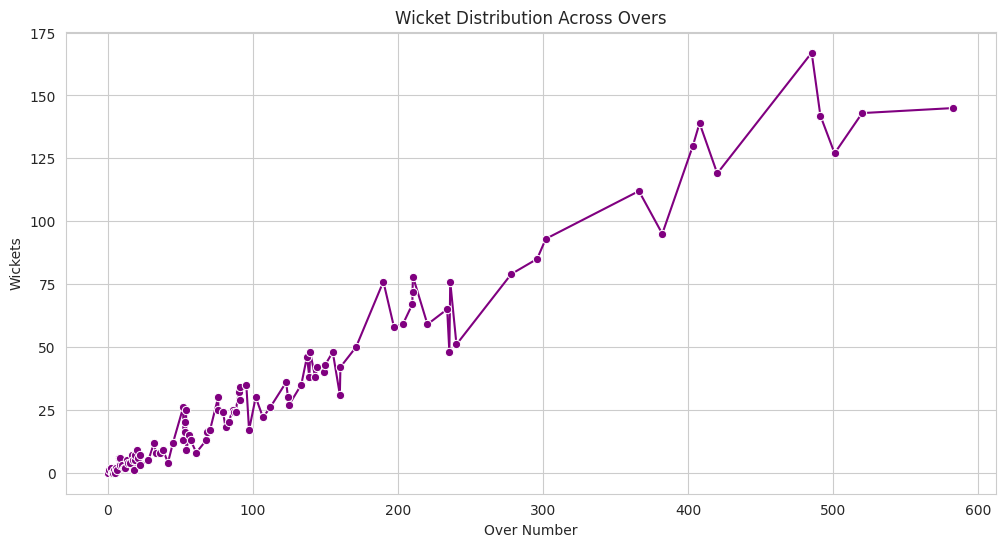

Total Runs Scored in Powerplay: 20382.0
Total Runs Scored in Death Over: 1915.0


<ipython-input-6-abfc80e64bb9>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy', y='Name', data=most_economical_bowlers, palette='coolwarm')


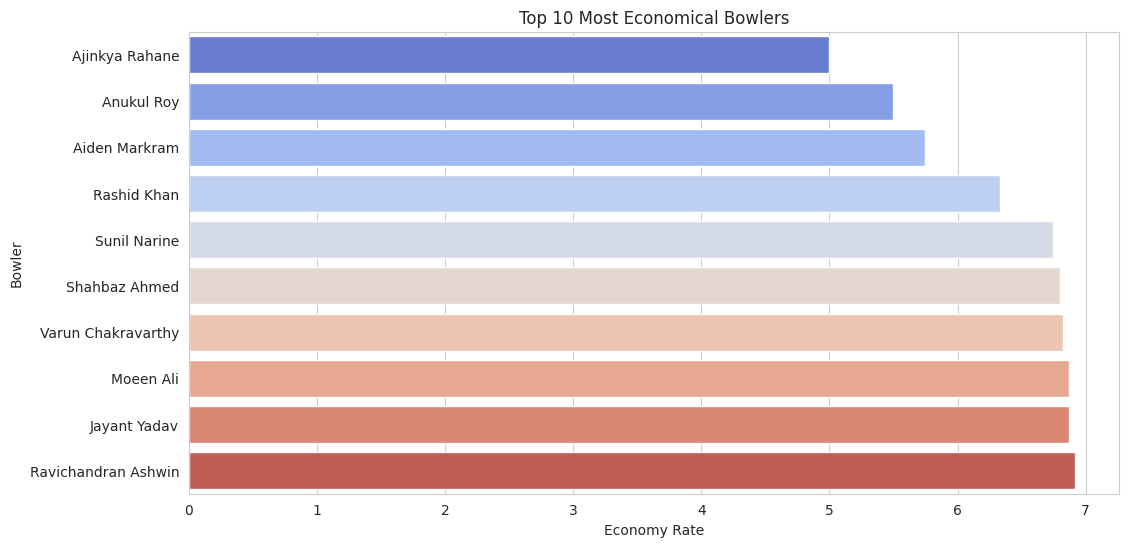

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
file_path = '/content/IPL_Data-1.csv'
ipl_df = pd.read_csv(file_path)

# Ensure relevant columns are numeric
numeric_cols = ['Overs', 'RunsScored', '4s', '6s', 'BattingS/R', 'RunsConceded', 'Wickets']
ipl_df[numeric_cols] = ipl_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Set plot style
sns.set_style('whitegrid')

# 1. Total Runs Scored Per Over
runs_per_over = ipl_df.groupby('Overs')['RunsScored'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Overs', y='RunsScored', data=runs_per_over, palette='Blues')
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over Number')
plt.ylabel('Total Runs Scored')
plt.show()

# 2. Dismissal Types Distribution (Assuming 'Type' contains dismissal types)
plt.figure(figsize=(8, 6))
sns.countplot(y='Type', data=ipl_df, palette='coolwarm', order=ipl_df['Type'].value_counts().index)
plt.title('Dismissal Types Distribution')
plt.ylabel('Dismissal Type')
plt.xlabel('Count')
plt.show()

# 3. Total Extra Runs Conceded by Teams (Assuming "RunsConceded" is equivalent)
extra_runs = ipl_df.groupby('Team')['RunsConceded'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='RunsConceded', y='Team', data=extra_runs, palette='Set1')
plt.title('Total Extra Runs Conceded by Teams')
plt.xlabel('Extra Runs')
plt.ylabel('Team')
plt.show()

# 4. Average Runs Per Over
avg_runs_per_over = ipl_df.groupby('Overs')['RunsScored'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='Overs', y='RunsScored', data=avg_runs_per_over, marker='o', color='green')
plt.title('Average Runs Per Over')
plt.xlabel('Over Number')
plt.ylabel('Average Runs')
plt.show()

# 5. Distribution of Runs Per Ball (1s, 2s, 4s, 6s)
plt.figure(figsize=(8, 6))
runs_per_ball = ['4s', '6s']
ipl_df[runs_per_ball].sum().plot(kind='bar', color=['#4CAF50', '#FF5722'])
plt.title('Distribution of Runs Per Ball')
plt.ylabel('Count')
plt.xlabel('Run Type')
plt.show()

# 6. Top 10 Batsmen by Strike Rate
top_strike_rate = ipl_df.nlargest(10, 'BattingS/R')[['Name', 'BattingS/R']]
plt.figure(figsize=(12, 6))
sns.barplot(x='BattingS/R', y='Name', data=top_strike_rate, palette='magma')
plt.title('Top 10 Batsmen by Strike Rate')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()

# 7. Most Sixes Hit by Players
top_six_hitters = ipl_df.nlargest(10, '6s')[['Name', '6s']]
plt.figure(figsize=(12, 6))
sns.barplot(x='6s', y='Name', data=top_six_hitters, palette='viridis')
plt.title('Most Sixes Hit by Players')
plt.xlabel('Number of Sixes')
plt.ylabel('Player')
plt.show()

# 8. Dot Ball Percentage by Bowler (Assuming dot balls = Overs * 6 - RunsConceded)
ipl_df['DotBalls'] = ipl_df['Overs'] * 6 - ipl_df['RunsConceded']
ipl_df['DotBallPct'] = (ipl_df['DotBalls'] / (ipl_df['Overs'] * 6)) * 100
top_dot_bowlers = ipl_df.nlargest(10, 'DotBallPct')[['Name', 'DotBallPct']]
plt.figure(figsize=(12, 6))
sns.barplot(x='DotBallPct', y='Name', data=top_dot_bowlers, palette='rocket')
plt.title('Dot Ball Percentage by Bowler')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Bowler')
plt.show()

# 9. Top 10 Bowlers Conceding Most Boundaries (4s + 6s)
ipl_df['BoundariesConceded'] = ipl_df['4s'] + ipl_df['6s']
top_boundary_conceders = ipl_df.nlargest(10, 'BoundariesConceded')[['Name', 'BoundariesConceded']]
plt.figure(figsize=(12, 6))
sns.barplot(x='BoundariesConceded', y='Name', data=top_boundary_conceders, palette='cubehelix')
plt.title('Top 10 Bowlers Conceding Most Boundaries')
plt.xlabel('Boundaries Conceded')
plt.ylabel('Bowler')
plt.show()


# 10. Wicket Distribution Across Overs
wickets_per_over = ipl_df.groupby('Overs')['Wickets'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Overs', y='Wickets', data=wickets_per_over, marker='o', color='purple')
plt.title('Wicket Distribution Across Overs')
plt.xlabel('Over Number')
plt.ylabel('Wickets')
plt.show()

# 11. Total Runs Scored in Powerplay (Overs 1-6)
powerplay_runs = ipl_df[ipl_df['Overs'] <= 6]['RunsScored'].sum()
print(f'Total Runs Scored in Powerplay: {powerplay_runs}')

# 12. Total Runs Scored in Death Over (Overs 16-20)
death_over_runs = ipl_df[(ipl_df['Overs'] >= 16) & (ipl_df['Overs'] <= 20)]['RunsScored'].sum()
print(f'Total Runs Scored in Death Over: {death_over_runs}')

# 13. Top 10 Most Economical Bowlers
ipl_df['Economy'] = ipl_df['RunsConceded'] / ipl_df['Overs']
most_economical_bowlers = ipl_df.nsmallest(10, 'Economy')[['Name', 'Economy']]
plt.figure(figsize=(12, 6))
sns.barplot(x='Economy', y='Name', data=most_economical_bowlers, palette='coolwarm')
plt.title('Top 10 Most Economical Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()